# Filters


## What is a filter?

- Filter is a kernel convoluted to image.

### So, What is convolution?

## 1-D Convolution


![Image](Files/conv/01_1D.gif)

![Image](Files/conv/bb_copy.gif)

### Padding

- No Padding

![Image](Files/conv/no_pad.png)

- Zero padding

![Image](Files/conv/pad_zeros.png)

- Constant Padding

![Image](Files/conv/pad_const.png)

- Circular Padding

![Image](Files/conv/pad_circular.png)

- Mirror Padding

![Image](Files/conv/pad_mirror.png)


### Stride


- Stride 1

![Image](Files/conv/stride_1.gif)

- Stride 2

![Image](Files/conv/stride_2.gif)

- Stride 4

![Image](Files/conv/stride_4.gif)

## 2-D Convolution


![Image](Files/conv/multi00.gif)

![Image](Files/conv/multi01.gif)

![Image](Files/conv/multi02.gif)

![Image](Files/conv/multi03.gif)

## Libraries we will use


- OpenCV
  - Installation
    - ```pip install opencv-contrib-python```
- NumPy
  - Installation
    - ```pip install numpy```
- MatPlotLib
  - Installation
    - ```pip install matplotlib```
- Pillow
  - Installation
    - ```pip install Pillow```

In [ ]:
!pip3 install matplotlib

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Filters In OpenCV

In [ ]:
src = np.array(
    [
        [7,2,3,3,8],
        [4,5,3,8,4],
        [3,3,2,8,4],
        [2,8,7,2,7],
        [5,4,4,5,4]
    ]
, dtype=np.float32)


kernel = np.array(
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ]
, dtype=np.float32)


out = cv2.filter2D(src, -1, kernel, borderType=cv2.BORDER_DEFAULT)
print (out)

In [ ]:
plt.imshow(src, cmap='gray');

In [ ]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10,10))
ax0.imshow(src, cmap='gray'), ax0.set_title('Source')
ax1.imshow(kernel, cmap='gray'), ax1.set_title('Kernel')
ax2.imshow(out, cmap='gray'), ax2.set_title('Output') ;

In [4]:
def SHOW(img):
    display(Image.fromarray(img));

In [ ]:
img = cv2.imread('./Files/001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

SHOW(img)

## Blur
Used for noise reduction.

In [ ]:
np.ones((5,5), np.float32)/25

In [ ]:
kernel1 = np.ones((5,5),np.float32)/25
dst1 = cv2.filter2D(img,-1,kernel1)

SHOW(dst1)

In [ ]:
s = 20
kernel2 = np.ones((s,s),np.float32)/(s*s)
dst2 = cv2.filter2D(img,-1,kernel2)

SHOW(dst2)

In [ ]:
s = 5
kernel2 = np.ones((s,s),np.float32)/(s*s)
dst2 = cv2.filter2D(img,-1,kernel2)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(30,15))
ax0.imshow(img)
ax1.imshow(dst1)
ax2.imshow(dst2);

### Averaging

In [ ]:
avg = cv2.blur(img,(21,21))
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(25,10))
ax0.imshow(img)
ax1.imshow(avg);

### Gaussian


![](./Files/Gaussian.jpg)

In [ ]:
gaussian = cv2.GaussianBlur(img, (21,21), 0)

f, ax = plt.subplots(2, 2, figsize=(25,10))
ax[0][0].imshow(avg), ax[0][1].set_title('Avg')
ax[1][0].imshow(gaussian), ax[1][0].set_title('Gaussian');
ax[0][1].imshow(img), ax[0][1].set_title('Original');
ax[1][1].imshow(img), ax[1][1].set_title('Original');

#### Quiz!

Create a 100*100 image with first half rows white and the other half black. Then, apply Gaussian Filter with kernel controlling track bar and describe the result!

### Median

In [ ]:
median = cv2.medianBlur(img, 21)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(25,10))
ax0.imshow(img), ax0.set_title('Original')
ax1.imshow(median), ax1.set_title('Median');

### BiLateral


- An amazig filter for perseving edges.

![](Files/bilateral-filtering.png)

In [ ]:
bilateral = cv2.bilateralFilter(img,20,75,75)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(25,10))
ax0.imshow(img), ax0.set_title('Original')
ax1.imshow(bilateral), ax1.set_title('BiLateral');

### Comparison

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(25,15))
axes[0,0].imshow(img), axes[0,0].set_title('Original')
axes[0,1].imshow(gaussian), axes[0,1].set_title('Gaussian')
axes[1,0].imshow(median), axes[1,0].set_title('Median')
axes[1,1].imshow(bilateral), axes[1,1].set_title('BiLateral');

### Overall playground

In [ ]:
import cv2
import numpy as np 

def nothing(x):
    pass

img = cv2.imread('Files/001.jpg')
blur = cv2.blur(img,(3,3))
cv2.namedWindow('Image')

cv2.createTrackbar('ker', 'Image', 0, 51, nothing)
cv2.createTrackbar('mode', 'Image', 0, 3, nothing)
modes = ['Averaging', 'Gaussian Blurring', 'Median Blurring', 'Bilateral Filtering']
font = cv2.FONT_HERSHEY_SIMPLEX

while(1):
    ker = cv2.getTrackbarPos('ker','Image')
    if (ker % 2 == 0):
        ker += 1
    
    mode = cv2.getTrackbarPos('mode','Image')
    if (mode == 0):
        blur = cv2.blur(img,(ker,ker))
    elif(mode == 1):
        blur = cv2.GaussianBlur(img,(ker,ker),0)
    elif(mode == 2):
        blur = cv2.medianBlur(img,ker)
    elif(mode == 3):
        blur = cv2.bilateralFilter(img, ker, 75, 75)
    
    cv2.putText(blur,
                modes[mode],
                (10,20),
                font,
                1,
                (255, 255, 255),
                2,
                cv2.LINE_AA)
    
    cv2.imshow('Image', blur)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
    
cv2.destroyAllWindows()

### Salt and Piper Noise!

#### The question is, What do you think is the right filter to apply?

![Image](Files/Conv/001SP.jpg)

In [ ]:
import cv2

def nothing(x):
    pass

img = cv2.imread('Files/Conv/001SP.jpg')
blur = cv2.blur(img,(3,3))
cv2.namedWindow('Image')

cv2.createTrackbar('ker', 'Image', 0, 51, nothing)
cv2.createTrackbar('mode', 'Image', 0, 3, nothing)
modes = ['Averaging', 'Gaussian Blurring', 'Median Blurring', 'Bilateral Filtering']
font = cv2.FONT_HERSHEY_SIMPLEX

while(1):
    ker = cv2.getTrackbarPos('ker','Image')
    if (ker % 2 == 0):
        ker += 1
    
    mode = cv2.getTrackbarPos('mode','Image')
    if (mode == 0):
        blur = cv2.blur(img,(ker,ker))
    elif(mode == 1):
        blur = cv2.GaussianBlur(img,(ker,ker),0)
    elif(mode == 2):
        blur = cv2.medianBlur(img,ker)
    elif(mode == 3):
        blur = cv2.bilateralFilter(img, ker, 75, 75)
    
    cv2.putText(blur,
                modes[mode] + " _ " + str(ker),
                (10,20),
                font,
                1,
                (255, 0, 255),
                2,
                cv2.LINE_AA)
    
    cv2.imshow('Image', blur)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()

## Sharpenning

In [1]:
import cv2
import numpy as np

image = cv2.imread('Files/001.jpg')
image = image[:,:,::-1]
kernel_sharpen_0 = np.array([[ 0,  1,  0],
                             [ 1, -5,  1],
                             [ 0,  1,  0]])

kernel_sharpen_1 = np.array([[ 0, -1,  0],
                             [-1,  5, -1],
                             [ 0, -1,  0]])

kernel_sharpen_2 = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

kernel_sharpen_3 = np.array([[1,  1, 1],
                             [1, -7, 1],
                             [1,  1, 1]])

kernel_sharpen_4 = np.array([[-1, -1, -1, -1, -1],
                             [-1,  2,  2,  2, -1],
                             [-1,  2,  8,  2, -1],
                             [-1,  2,  2,  2, -1],
                             [-1, -1, -1, -1, -1]]) / 8.0

sharp_image_0 = cv2.filter2D(image, -1, kernel_sharpen_0)
sharp_image_1 = cv2.filter2D(image, -1, kernel_sharpen_1)
sharp_image_2 = cv2.filter2D(image, -1, kernel_sharpen_2)
sharp_image_3 = cv2.filter2D(image, -1, kernel_sharpen_3)
sharp_image_4 = cv2.filter2D(image, -1, kernel_sharpen_4)

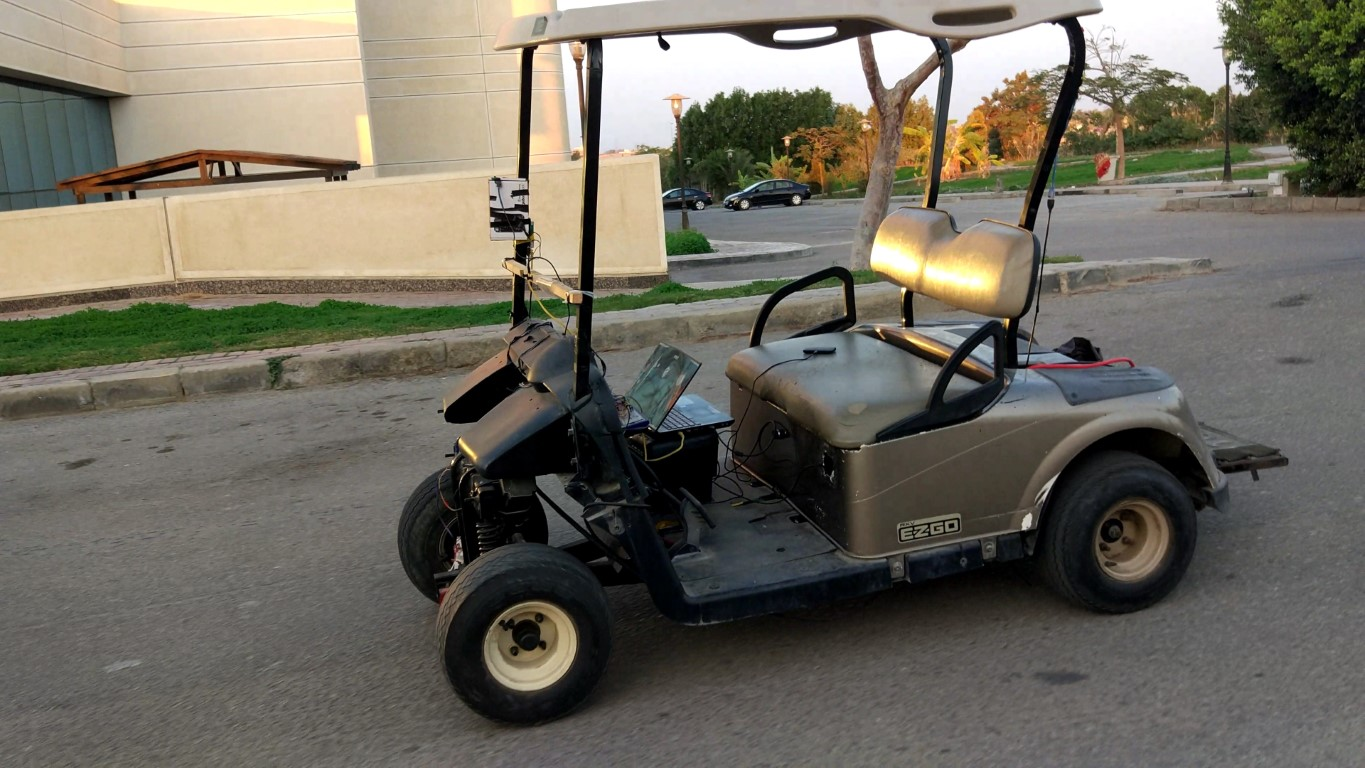

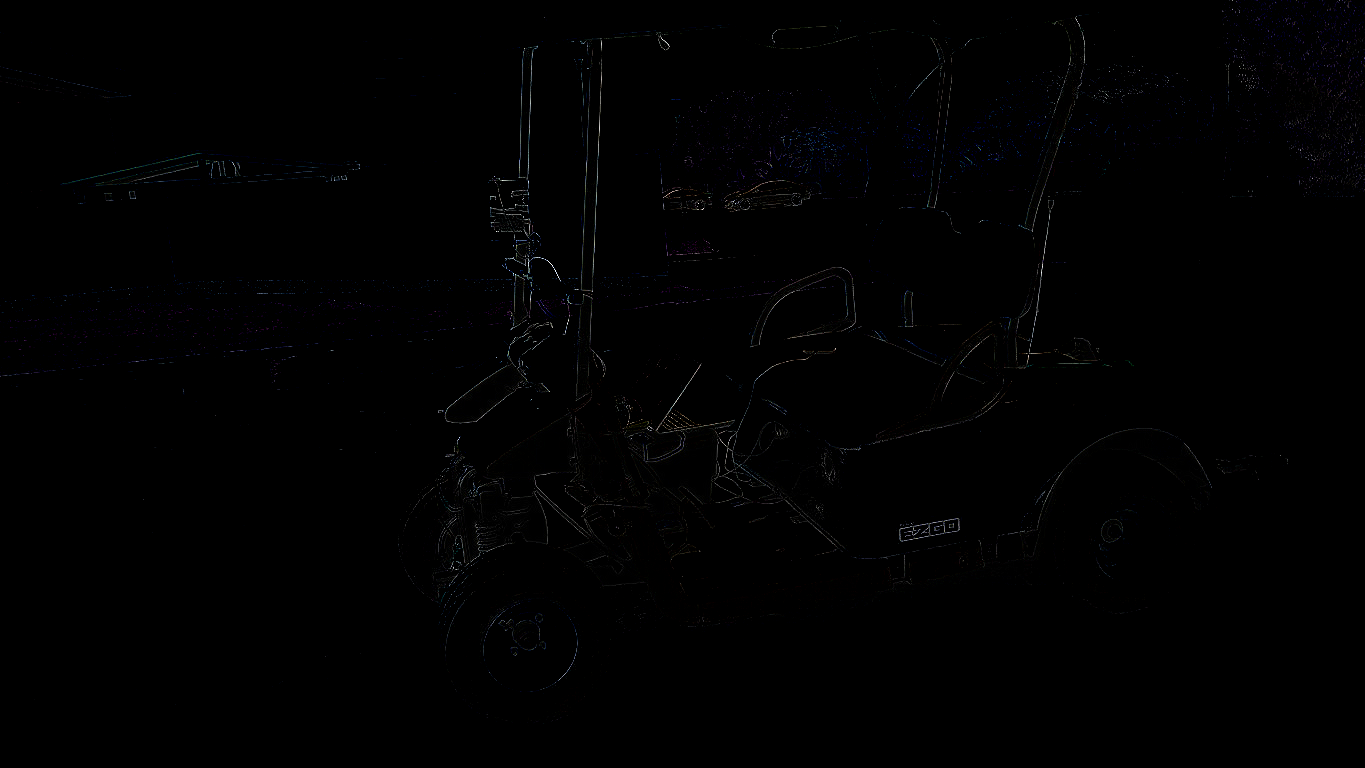

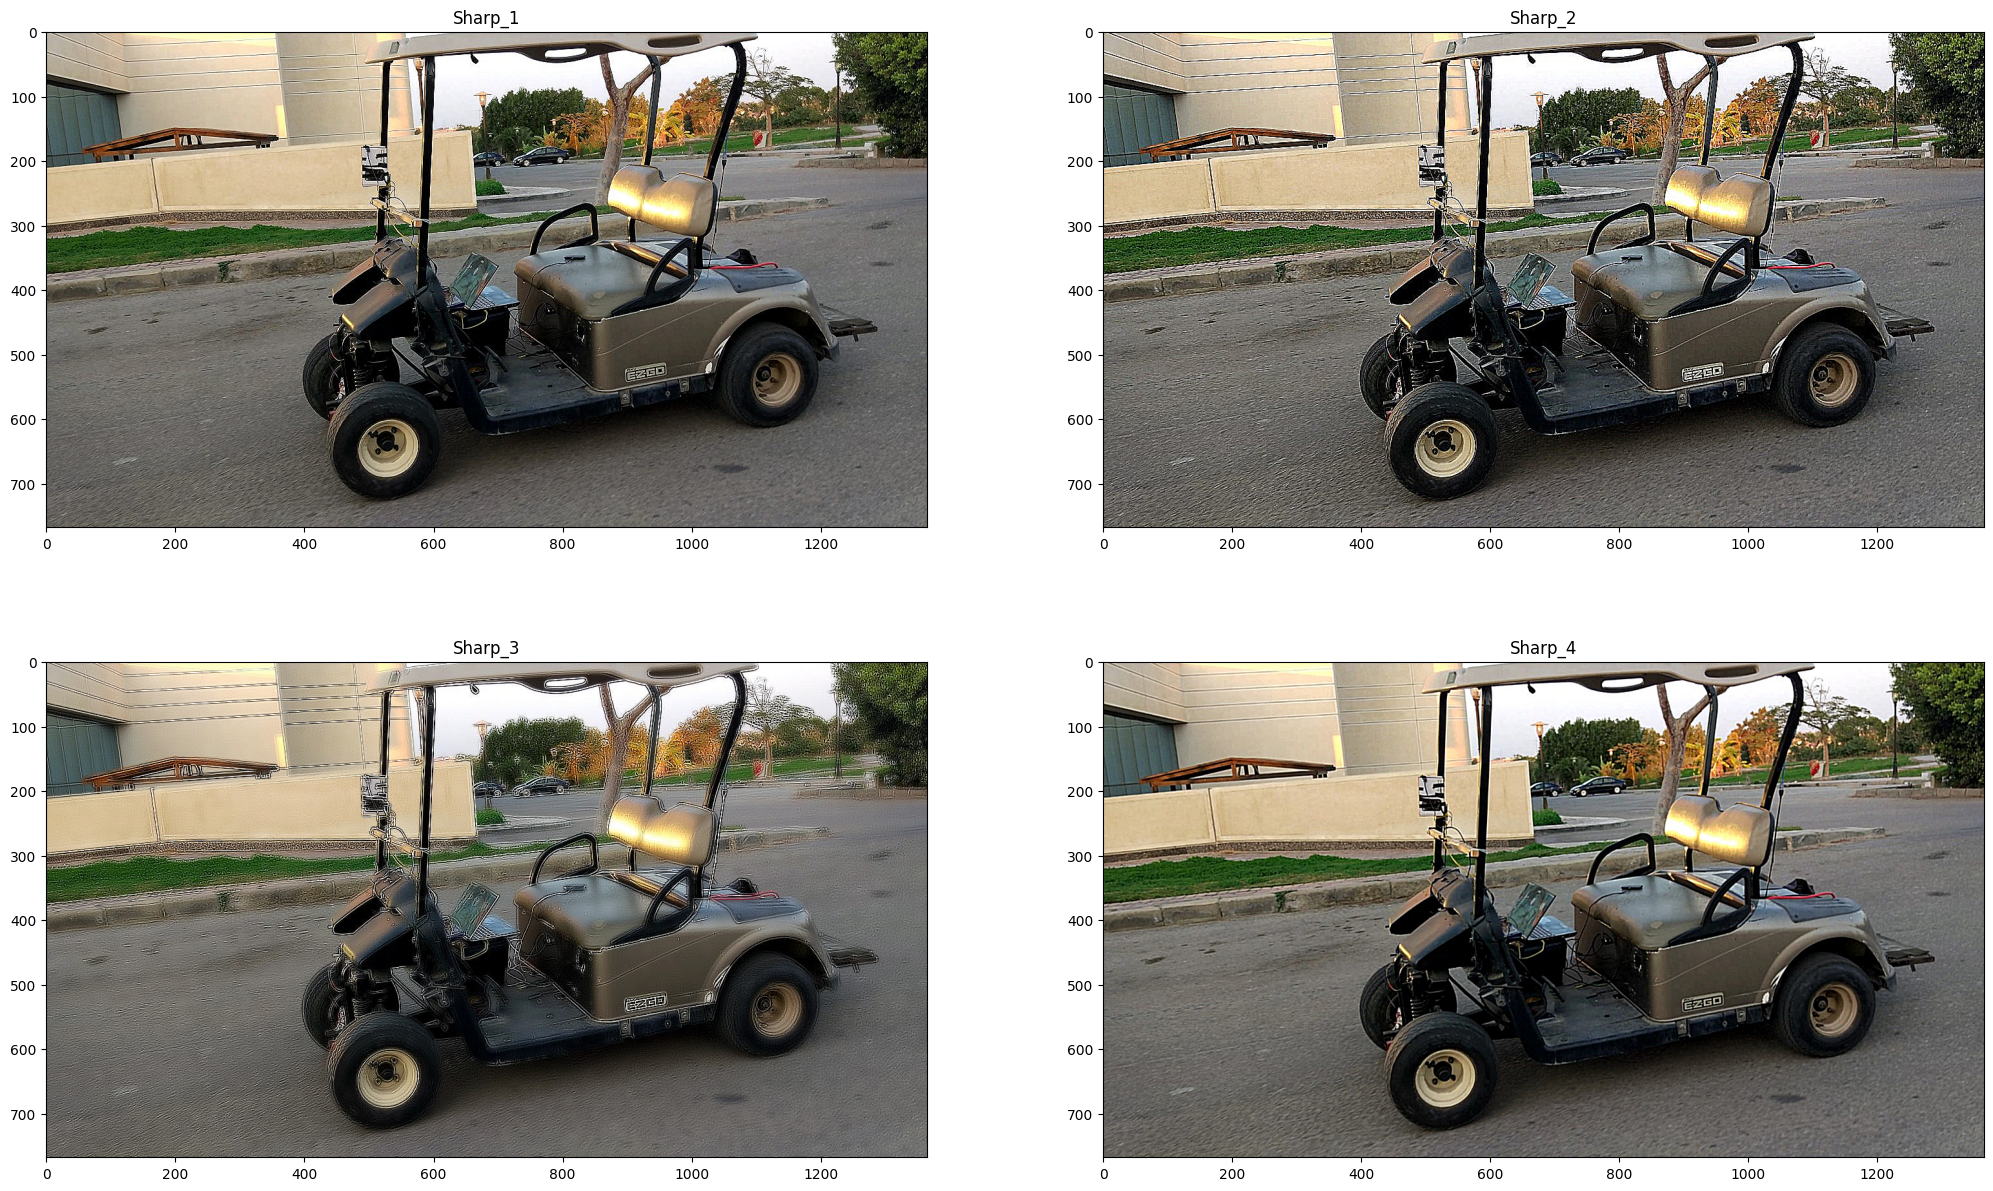

In [7]:
image = cv2.imread('Files/001.jpg')
image = image[:,:,::-1]
SHOW(image)
SHOW(sharp_image_0)
f, axes = plt.subplots(2, 2, figsize=(25,15))
axes[0,0].imshow(sharp_image_1), axes[0,0].set_title('Sharp_1')
axes[0,1].imshow(sharp_image_2), axes[0,1].set_title('Sharp_2')
axes[1,0].imshow(sharp_image_3), axes[1,0].set_title('Sharp_3')
axes[1,1].imshow(sharp_image_4), axes[1,1].set_title('Sharp_4');

## Resources

### OpenCV Tutorials
https://docs.opencv.org/4.8.0/d4/d13/tutorial_py_filtering.html

# Thank You!